$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 3: Activation Functions

Jared Zymbaluk

## Overview

In this assignment, you will make a new version of your ```NeuralNetwork``` class from the previous assignment. For this new version, define the activation function to be the Rectified Linear Unit (ReLU).

You will compare the training and testing performances of networks with tanh and networks with the ReLU activation functions.

### NeuralNetworkReLU

Start with the ```NeuralNetwork``` class defined in ```neuralnetworksA2.py```.  Define a new class named ```NeuralNetworkReLU``` that extends ```NeuralNetwork``` and simply defines new implementations of ```activation``` and ```activationDerivative``` that implement the ReLU activation function.

In [1]:
import neuralnetworksA2 as nn
import numpy as np

### Comparison

Define a new function ```partition``` that is used as this example shows.

In [7]:
def partition(X, T, p, shuffle=False):
    if shuffle:
        np.random.shuffle(X)
        np.random.shuffle(T)
    size,_ = np.shape(X)
    grab = size*p
    newX = X[:int(grab)]
    newT = T[:int(grab)]
    Xt = X[int(grab):]
    Tt = T[int(grab):]
    return newX,newT,Xt,Tt

In [9]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

In [ ]:
X = np.arange(10*2).reshape((10, 2))
T = X[:, 0:1] * 0.1

In [ ]:
X

In [ ]:
T

In [ ]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=False)

In [ ]:
Xtrain

In [ ]:
Ttrain

In [ ]:
Xtest

In [ ]:
Ttest

If ```shuffle=True``` is used as an argument, then the samples are randomly rearranged before the partitions are formed.

In [ ]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)

In [ ]:
Xtrain

In [ ]:
Ttrain

In [ ]:
Xtest

In [ ]:
Ttest

You will use the ```energydata_complete.csv``` data for the following comparisons.  Load this data using pandas, then create matrix $X$ using all columns except ```['date','Appliances', 'rv1', 'rv2']``` and create $T$ using just ```'Appliances'```.  Write python code that performs the following algorithm.

  - For each of the two activation functions, ```tanh```, and ```ReLU```:
      - For each hidden layer structure in [[u]*nl for u in [1, 2, 5, 10, 50] for nl in [1, 2, 3, 4, 5, 10]]:
          - Repeat 10 times:
              - Randomly partition the data into training set with 80% of samples and testing set with other 20%.
              - Create a neural network using the given activation function and hidden layer structure.
              - Train the network for 100 iterations.
              - Calculate two RMS errors, one on the training partition and one on the testing partitions.
          - Calculate the mean of the training and testing RMS errors over the 10 repetitions.

You will have to add steps in this algorithm to collect the results you need to make the following plot.

Make a plot of the RMS errors versus the hidden layer structure.  On this plot include four curves, for the training and testing RMS errors for each of the two activation functions.  Label both axes and add a legend that identifies each curve.

As always, discuss what you see.  What can you say about which activation function is best?

In [2]:
file = np.genfromtxt('energydata_complete.csv', dtype='str',delimiter=',',deletechars='"')
file = np.char.replace(file, '"', '')
file = np.char.replace(file, ' ', '')
file = np.delete(file, 0,1)
file = np.delete(file, -1,1)
file = np.delete(file, -1,1)
names = file[0]
names = names.astype(np.str)
data = file[1:]
data = data.astype(np.float)

##### ^Data extracted using numpy

In [3]:
T = np.take(data,[0],1)
X = np.take(data,range(1,26),1)
Tnames = np.take(names,[0])
Xnames = np.take(names,range(1,26))

In [4]:
T

array([[  60.],
       [  60.],
       [  50.],
       ..., 
       [ 270.],
       [ 420.],
       [ 430.]])

In [5]:
X

array([[ 30.        ,  19.89      ,  47.59666667, ...,   7.        ,
         63.        ,   5.3       ],
       [ 30.        ,  19.89      ,  46.69333333, ...,   6.66666667,
         59.16666667,   5.2       ],
       [ 30.        ,  19.89      ,  46.3       , ...,   6.33333333,
         55.33333333,   5.1       ],
       ..., 
       [ 10.        ,  25.5       ,  46.59666667, ...,   3.66666667,
         25.33333333,  13.26666667],
       [ 10.        ,  25.5       ,  46.99      , ...,   3.83333333,
         26.16666667,  13.23333333],
       [ 10.        ,  25.5       ,  46.6       , ...,   4.        ,
         27.        ,  13.2       ]])

In [16]:
import pandas as pd

errorsMeanX = []
errorsMeanReLUX = []
errorsMeanT = []
errorsMeanReLUT = []
hiddens = [0] + [[u]*nl for u in [1, 2, 5, 10, 50] for nl in [1, 2, 3, 4, 5, 10]]
print('hiddens =', hiddens)
for hids in hiddens: 
    errorsX = []
    errorsT = []
    errorsReLUX = []
    errorsReLUT = []
    for i in range(10):
        Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)
        nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
        nnet2 = nn.NeuralNetworkReLU(Xtrain.shape[1], hids, Ttrain.shape[1])
        nnet.train(Xtrain, Ttrain, 100)
        nnet2.train(Xtrain, Ttrain, 100)
        errorsX.append(rmse(Ttrain, nnet.use(Xtrain)))
        errorsT.append(rmse(Ttest, nnet.use(Xtest)))
        errorsReLUX.append(rmse(Ttrain, nnet2.use(Xtrain)))
        errorsReLUT.append(rmse(Ttest, nnet2.use(Xtest)))
    errorsMeanX.append([hids,np.mean(errorsX)])
    errorsMeanT.append([hids,np.mean(errorsT)])
    errorsMeanReLUX.append([hids,np.mean(errorsReLUX)])
    errorsMeanReLUT.append([hids,np.mean(errorsReLUT)])
    print("Done with layer ",hids)

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2], [2, 2], [2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50]]
Done with layer  0
Done with layer  [1]
Done with layer  [1, 1]
Done with layer  [1, 1, 1]
Done with layer  [1, 1, 1, 1]
Done with layer  [1, 1, 1, 1, 1]
Done with layer  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Done with layer  [2]
Done with layer  [2, 2]
Done with layer  [2, 2, 2]
Done with layer  [2, 2, 2, 2]
Done with layer  [2, 2, 2, 2, 2]
Done with layer  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Done with layer  [5]
Done with layer  [5, 5]
Done with layer  [5, 5, 5]
Done with layer  [5, 5, 5, 5]
Done with laye

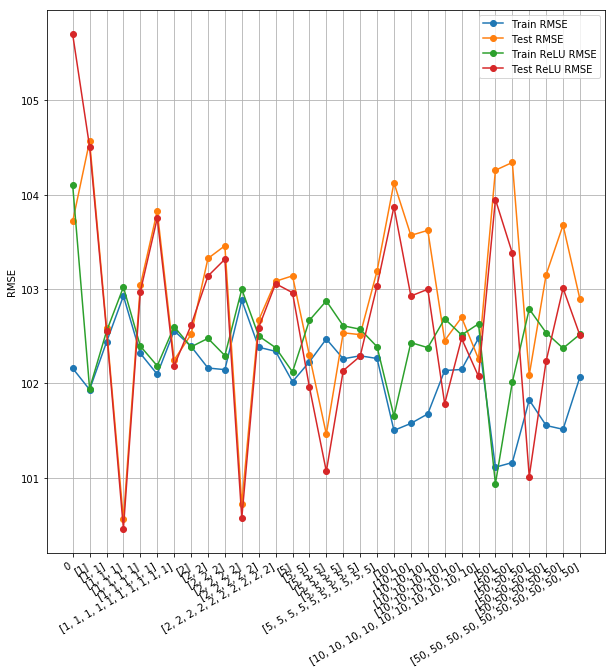

In [65]:
import matplotlib.pyplot as plt
xf = []
tf = []
xreluf = []
treluf = []
for i in range(len(errorsMeanX)):
    xf.append(errorsMeanX[i][1])
    tf.append(errorsMeanT[i][1])
    xreluf.append(errorsMeanReLUX[i][1])
    treluf.append(errorsMeanReLUT[i][1])
    
plt.figure(figsize=(10, 10))
plt.plot(xf, 'o-')
plt.plot(tf, 'o-')
plt.plot(xreluf, 'o-')
plt.plot(treluf, 'o-')
plt.legend(('Train RMSE', 'Test RMSE','Train ReLU RMSE', 'Test ReLU RMSE'))
plt.ylabel('RMSE')
plt.xticks(range(len(hiddens)), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)
plt.show()

^As we can see from our graphs there is not much of a difference between the two training algorithms. ReLU did perform a little bit better than the normal activation. The best structures seems to be [1,1,1] and [2,2,2,2]. Overal ReLU seems to be a better method of activation!

## Grading and Check-in

Your notebook will be run and graded automatically. Test this grading process by first downloading [A3grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A3grader.tar) and extract `A3grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of  60 / 60 if your functions and class are defined correctly. The remaining 40 points will be based on the results you obtain from the comparisons of hidden layer structures and the two activation functions applied to the energy data.

For the grading script to run correctly, you must first name this notebook as `Lastname-A3.ipynb` with `Lastname` being your last name, and then save this notebook.  Your working director must also contain `neuralnetworksA2.py` and `mlutilities.py` from lecture notes.

Combine your notebook, `neuralnetworkA2.py`, and `mlutilities.py` into one zip file or tar file.  Name your tar file `Lastname-A3.tar` or your zip file `Lastname-A3.zip`.  Check in your tar or zip file using the `Assignment 3` link in Canvas.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include other tests.